## Airplane Crash Data Analysis

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Setup complete. Ready for Aviation Crash Data Analysis.")

Setup complete. Ready for Aviation Crash Data Analysis.


In [11]:
crash_data = pd.read_csv("Airplane_Crashes_and_Fatalities_Since_1908_20190820105639.csv")
crash_data.head(10)

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,09/07/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,07/12/1912,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...
5,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,NaN,NaN,30.0,NaN,NaN,0.0,Hydrogen gas which was being vented was sucked...
6,03/05/1915,01:00,"Tienen, Belgium",Military - German Navy,NaN,NaN,Zeppelin L-8 (airship),NaN,NaN,41.0,NaN,NaN,21.0,NaN,NaN,0.0,Crashed into trees while attempting to land af...
7,09/03/1915,15:20,"Off Cuxhaven, Germany",Military - German Navy,NaN,NaN,Zeppelin L-10 (airship),NaN,NaN,19.0,NaN,NaN,19.0,NaN,NaN,0.0,"Exploded and burned near Neuwerk Island, when..."
8,07/28/1916,NaN,"Near Jambol, Bulgeria",Military - German Army,NaN,NaN,Schutte-Lanz S-L-10 (airship),NaN,NaN,20.0,NaN,NaN,20.0,NaN,NaN,0.0,"Crashed near the Black Sea, cause unknown."
9,09/24/1916,01:00,"Billericay, England",Military - German Navy,NaN,NaN,Zeppelin L-32 (airship),NaN,NaN,22.0,NaN,NaN,22.0,NaN,NaN,0.0,Shot down by British aircraft crashing in flames.


In [12]:
#### Run diagnostics on the data:

crash_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4967 entries, 0 to 4966
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4967 non-null   object 
 1   Time                   3457 non-null   object 
 2   Location               4963 non-null   object 
 3   Operator               4957 non-null   object 
 4   Flight #               1315 non-null   object 
 5   Route                  4192 non-null   object 
 6   AC Type                4952 non-null   object 
 7   Registration           4694 non-null   object 
 8   cn/ln                  4299 non-null   object 
 9   Aboard                 4949 non-null   float64
 10  Aboard Passangers      4738 non-null   float64
 11  Aboard Crew            4741 non-null   float64
 12  Fatalities             4959 non-null   float64
 13  Fatalities Passangers  4725 non-null   float64
 14  Fatalities Crew        4726 non-null   float64
 15  Grou

#### 1. Data Type Issues

- `Date` column is of type `object` -- I need to convert this to `datetime` for proper time-series analysis.
- `Time` column is an `object` -- I need to convert this to `datetime` as well.
- Count data (e.g. `Aboard`, `Fatalities`, etc.) should be `int`.

#### 2. Missing Data Issues

- `Flight #` has 73.5% Null values -- I need to address this issue.

#### 3. Clean Dates and Extract Year

- Create a new column for `Year` as an integer.

In [13]:
# 1. Convert 'Date' to datetime objects
crash_data['Date'] = pd.to_datetime(crash_data['Date'])

# 2. Extract the year and store it as a new integer column
crash_data['Year'] = crash_data['Date'].dt.year.astype(int)

# 3. Verify the change by checking the dtypes again
print(crash_data[['Date', 'Year']].head())
print(crash_data.dtypes[['Date', 'Year']])

        Date  Year
0 1908-09-17  1908
1 1909-09-07  1909
2 1912-07-12  1912
3 1913-08-06  1913
4 1913-09-09  1913
Date    datetime64[ns]
Year             int64
dtype: object


#### 4. Standardise Column Names

- A consistent formatting of column names makes writing code easier.

In [14]:
# 1. Get the current list of column names
current_cols = crash_data.columns

# 2. Define the new, standardized column names (snake_case, no symbols)
new_cols = [
    'date', 'time', 'location', 'operator', 'flight_no', 'route', 
    'ac_type', 'registration', 'cn_ln', 'aboard_total', 'passengers_aboard', 
    'crew_aboard', 'fatalities_total', 'passengers_fatalities', 
    'crew_fatalities', 'ground_fatalities', 'summary', 'year'
]

# Note: We are keeping the original names for Operator and Location for now.
#       'Aboard' is renamed to 'aboard_total' and 'Fatalities' to 'fatalities_total' for clarity.
#       'Flight #' becomes 'flight_no'.
#       'AC Type' becomes 'ac_type'.

# 3. Apply the new names to the DataFrame
crash_data.columns = new_cols

# 4. Verify the change
print(crash_data.columns)

Index(['date', 'time', 'location', 'operator', 'flight_no', 'route', 'ac_type',
       'registration', 'cn_ln', 'aboard_total', 'passengers_aboard',
       'crew_aboard', 'fatalities_total', 'passengers_fatalities',
       'crew_fatalities', 'ground_fatalities', 'summary', 'year'],
      dtype='object')


#### 5. Handle missing Fatality/Aboard Counts

- `NaN` values to be replaced with zeroes, and the data type converted from `float64` to `int64`.

In [15]:
# Identify all columns that should represent a count of people
count_cols = [
    'aboard_total', 'passengers_aboard', 'crew_aboard', 
    'fatalities_total', 'passengers_fatalities', 'crew_fatalities', 
    'ground_fatalities'
]

# 1. Impute (fill) all NaN values in these count columns with 0.
#    This assumes missing values in these fields mean zero people were involved/affected.
crash_data[count_cols] = crash_data[count_cols].fillna(0)

# 2. Convert the imputed columns from float64 to int64
#    This makes them the correct type for count data.
for col in count_cols:
    # Use astype(int) to convert the columns
    crash_data[col] = crash_data[col].astype(int)

# 3. Verify the changes
print(crash_data[count_cols].head())
print(crash_data[count_cols].dtypes)

   aboard_total  passengers_aboard  crew_aboard  fatalities_total  \
0             2                  1            1                 1   
1             1                  0            1                 1   
2             5                  0            5                 5   
3             1                  0            1                 1   
4            20                  0            0                14   

   passengers_fatalities  crew_fatalities  ground_fatalities  
0                      1                0                  0  
1                      0                0                  0  
2                      0                5                  0  
3                      0                1                  0  
4                      0                0                  0  
aboard_total             int64
passengers_aboard        int64
crew_aboard              int64
fatalities_total         int64
passengers_fatalities    int64
crew_fatalities          int64
ground_fatalities    

#### Clean `time` and Create `time_of_day`

In [16]:
# 1. Fill missing 'time' values with a placeholder string ('Unknown')
crash_data['time'] = crash_data['time'].fillna('Unknown')

# 2. Extract only the hour part of the time string (e.g., '14:30' -> 14)
# We use a lambda function to handle both 'Unknown' and valid time strings
def extract_hour(time_str):
    if time_str == 'Unknown' or not ':' in time_str:
        return -1 # Use -1 as a flag for Unknown/Invalid time
    try:
        # Split by ':' and try to convert the first part to an integer
        return int(time_str.split(':')[0])
    except ValueError:
        # Catch cases where the hour part might not be a number
        return -1

crash_data['hour'] = crash_data['time'].apply(extract_hour)

# 3. Define time categories based on the hour
def get_time_of_day(hour):
    if hour == -1:
        return 'Unknown'
    elif 5 <= hour < 12:
        return 'Morning (5-11)'
    elif 12 <= hour < 17:
        return 'Afternoon (12-16)'
    elif 17 <= hour < 21:
        return 'Evening (17-20)'
    else: # 21-4 (including 21, 22, 23, 0, 1, 2, 3, 4)
        return 'Night (21-4)'

crash_data['time_of_day'] = crash_data['hour'].apply(get_time_of_day)

# 4. Verify the distribution of the new feature
print("\nDistribution of Time of Day:")
print(crash_data['time_of_day'].value_counts())


Distribution of Time of Day:
time_of_day
Unknown              1510
Morning (5-11)       1100
Afternoon (12-16)     944
Night (21-4)          731
Evening (17-20)       682
Name: count, dtype: int64


The analysis of the distribution of the `time_of_day` shows us the following:

- 30.4% of crashes are `Unknown`, meaning that the largest category of crash times aren't even known. This will impact my analysis.
- Among the known times, `Morning (5-11)` is the highest with 22.1% of the crashes in this category.

When presenting findings related to the time of day, I must stress the uncertainty due to the `Unknown` category affecting my results. That being said, the `time_of_day` is still a useful feature to use when analysing crash severity and operator types.

#### Cleaning Location Data

I want to extract the country from the `location` column. Please note that `USSR` has been changed to `Russia` to simplify the analysis, as both refer to roughly the same area on the map. The same holds for the `Yugoslavia` -> `Serbia` transition.

In [17]:
# 1. Fill missing 'location' values with a placeholder string ('Unknown')
crash_data['location'] = crash_data['location'].fillna('Unknown')

# 2. Extract the country (last word after splitting by comma)
# The .str.split(',')[-1].str.strip() is robust for extracting the last part and cleaning whitespace
# The .apply(lambda x: x if x else 'Unknown') handles edge cases where the split is messy
crash_data['country'] = crash_data['location'].str.split(',').str[-1].str.strip()

# 3. Handle common misspellings or aliases (Data Analyst Standardization)
country_corrections = {
    'USSR': 'Russia',
    'Russia': 'Russia',
    'New Guinea': 'Papua New Guinea',
    'UK': 'United Kingdom',
    'Indian Ocean (Indonesia)': 'Indonesia',
    'Yugoslavia': 'Serbia',
    'Near East (Turkey)': 'Turkey',
    'China Sea': 'Ocean',
    'South Vietnam': 'Vietnam',
    'Taiwan': 'China' # Simplification based on common practice for historical data
}
crash_data['country'] = crash_data['country'].replace(country_corrections)

# 4. Verify the top 10 most frequent countries
print("\nTop 10 Countries by Crash Count:")
print(crash_data['country'].value_counts().head(10))


Top 10 Countries by Crash Count:
country
Russia        322
Brazil        175
Colombia      151
China         128
Canada        125
France        125
California    115
India         103
Alaska        102
England       101
Name: count, dtype: int64


California and Alaska are US states, not countries. I need to correct this.

In [18]:
# List common US states that might appear in the 'country' column
us_states = [
    'California', 'Alaska', 'Texas', 'Florida', 'Nevada', 
    'Arizona', 'Virginia', 'New Jersey', 'New York', 'Pennsylvania', 
    'Ohio', 'Illinois', 'Washington', 'Oregon', 'Utah', 'Georgia', 
    'North Carolina', 'South Carolina', 'Mississippi', 'Oklahoma', 'Hawaii',
    'Iowa', 'Michigan', 'Kansas', 'Nebraska', 'Missouri', 'Massachusetts', 
    'Connecticut', 'Maryland', 'Maine', 'Rhode Island', 'Delaware', 'Alabama', 
    'Colorado', 'Idaho', 'Kentucky', 'Minnesota', 'Montana', 'New Mexico', 
    'North Dakota', 'South Dakota', 'Tennessee', 'Vermont', 'West Virginia', 
    'Wyoming', 'Wisconsin', 'Indiana'
]

# Apply the correction: if the entry is in the US states list, set it to 'United States'
crash_data['country'] = crash_data['country'].apply(
    lambda x: 'United States' if x in us_states else x
)

# Also explicitly include the obvious 'USA' and 'US' entries if they exist (standardization)
crash_data['country'] = crash_data['country'].replace({
    'USA': 'United States',
    'US': 'United States'
})

# 3. Verify the new top 10 most frequent countries
print("\nTop 10 Countries by Crash Count (Post-US Correction):")
print(crash_data['country'].value_counts().head(10))


Top 10 Countries by Crash Count (Post-US Correction):
country
United States    979
Russia           322
Brazil           175
Colombia         151
China            128
France           125
Canada           125
India            103
England          101
Indonesia         97
Name: count, dtype: int64


##### Key Insights:

- The US is *by far* the most frequent location for airplane crashes in this dataset, with 979 crashes.
- Keeping in mind that the USSR and Russia have different borders, Russia is in second place with 322 crashes.

Before continuing on to the case study questions, I will visualise annual crash trends.

#### Visualising Annual Crash Trends

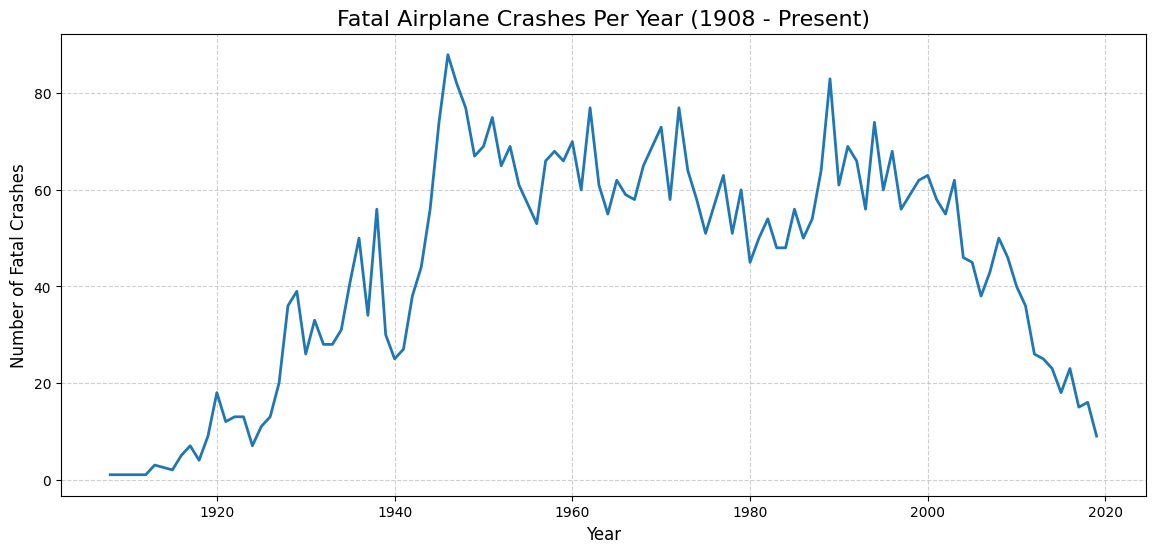

In [19]:
# 1. Group the data by year and count the number of crashes
yearly_crashes = crash_data.groupby('year').size().reset_index(name='crash_count')

# 2. Set up the visualization
plt.figure(figsize=(14, 6))
sns.lineplot(x='year', y='crash_count', data=yearly_crashes, linewidth=2)

# 3. Add titles and labels for professional presentation
plt.title('Fatal Airplane Crashes Per Year (1908 - Present)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Fatal Crashes', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#### **________________________________________________________________________________________________________________________________**

#### Ten-Year Period with the Most Airplane Crashes

I perform **binning** on the `year` column:

In [20]:
# 1. Create a 10-year period column (e.g., 1950, 1951, ... -> 1950-1959)
# We subtract the remainder when divided by 10 from the year.
# E.g., 1958 - (1958 % 10) = 1950
crash_data['decade_start'] = crash_data['year'] - (crash_data['year'] % 10)

# 2. Group by the decade start year and count the total number of crashes
decade_crashes = crash_data.groupby('decade_start').size().reset_index(name='crash_count')

# 3. Find the decade with the maximum crash count
max_crashes_decade = decade_crashes.loc[decade_crashes['crash_count'].idxmax()]

# 4. Format the result for clear presentation
start_year = int(max_crashes_decade['decade_start'])
end_year = start_year + 9
crash_count = int(max_crashes_decade['crash_count'])

print(f"1. Most Crashes: {start_year}-{end_year} with {crash_count} incidents.")

1. Most Crashes: 1950-1959 with 649 incidents.


#### Ten-Year Period with the Most Fatalities Onboard

Using the `decade_start` column created in the previous section of code, I sum the `fatalities_total` column:

In [21]:
# 1. Group by the decade start year and sum the total fatalities onboard
decade_fatalities = crash_data.groupby('decade_start')['fatalities_total'].sum().reset_index(name='total_fatalities')

# 2. Find the decade with the maximum total fatalities
max_fatalities_decade = decade_fatalities.loc[decade_fatalities['total_fatalities'].idxmax()]

# 3. Format the result for clear presentation
start_year = int(max_fatalities_decade['decade_start'])
end_year = start_year + 9
fatality_count = int(max_fatalities_decade['total_fatalities'])

print(f"2. Most Fatalities Onboard: {start_year}-{end_year} with {fatality_count:,} total fatalities.")

2. Most Fatalities Onboard: 1970-1979 with 19,751 total fatalities.


#### Ten-Year Period with the Most Crashes Due to Thunder/Lightning

Use a string search method on the `summary` column to find the relevant crashes:

In [22]:
# 1. Filter the DataFrame for records where 'summary' contains "thunder" or "lightning"
# The .str.contains() method is used for flexible text search, ignoring case
lightning_crashes = crash_data[
    crash_data['summary'].str.contains('thunder|lightning', case=False, na=False)
].copy()

# 2. Group the filtered data by the decade and count the incidents
decade_lightning = lightning_crashes.groupby('decade_start').size().reset_index(name='lightning_crash_count')

# 3. Find the decade with the maximum lightning-related crashes
max_lightning_decade = decade_lightning.loc[decade_lightning['lightning_crash_count'].idxmax()]

# 4. Format the result for clear presentation
start_year = int(max_lightning_decade['decade_start'])
end_year = start_year + 9
lightning_count = int(max_lightning_decade['lightning_crash_count'])

print(f"3. Most Thunder/Lightning Crashes: {start_year}-{end_year} with {lightning_count} incidents.")

3. Most Thunder/Lightning Crashes: 1950-1959 with 29 incidents.


The decade with the **most crashes** was the 1950s, during the post-WWII aviation boom. This was a time when aircraft propulsion transitioned from propellers to jets, and commercial flights became more widespread. Due to this combination of new technology and higher volumes, crashes were common, necessitating major safety regulations that we take for granted today. Anyone who has seen *Air Crash Investigation* can attest to this.

The decade with the most fatalities was the 1970s, with 19 751 in total. This decade coincides with the introduction of wide-body aircraft like the famous Boeing 747, with an associated increase in passenger capacity per flight. While the *number* of crashes in this decade was lower than in the 1950s, the greater capacity of planes meant more people killed per crash. This highlights the utility of using the *fatalities per flight* metric to assess safety standards and risks.

The decade with the most crashes due to thunder and/or lightning was also the 1950s. Compared to the weather forecast and detection technologies we enjoy today, the 1950s was relatively rudimentary. Combined with the new technology (jets vs. propellers) that allowed planes to fly higher, it stands to reason that planes would more commonly crash due to being struck by lightning than in any other decade. Plane construction methods (to allow the electric current to pass harmlessly across the outer surface of the fuselage) has allowed modern planes to fly more safely through thunderstorms than they did back then. Planes can also fly higher than in the 1950s, allowing them to fly *over* thunderstorms instead of *through* them - I have witnessed this firsthand.

* The 1950s were the riskiest period in aviation history, characterized by the highest volume of crashes, including weather-related events.

* The 1970s saw a shift: while the number of incidents declined (suggesting improving safety), the sheer scale of accidents increased due to the introduction of larger planes, resulting in the deadliest decade by total count.

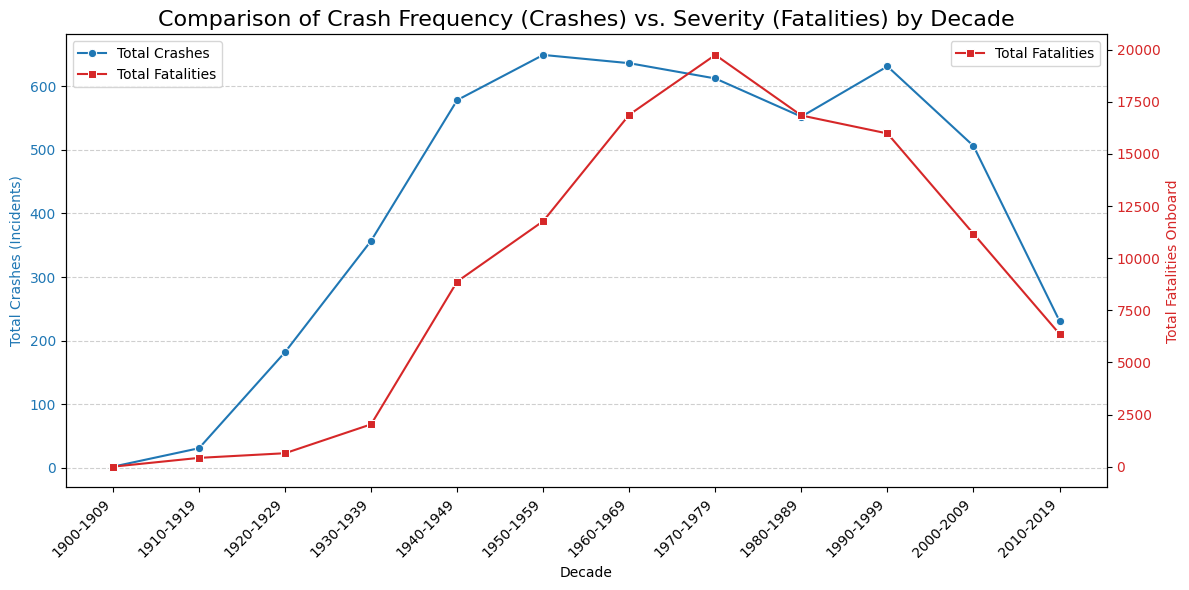

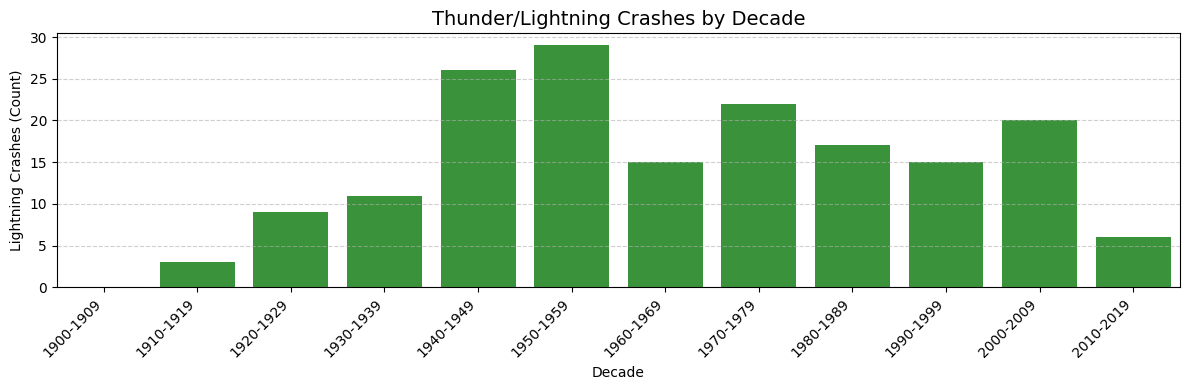

In [24]:
# --- AGGREGATION OF RELEVANT DATA ---
# a. Total Crashes
decade_crashes = crash_data.groupby('decade_start').size().reset_index(name='total_crashes')

# b. Total Fatalities
decade_fatalities = crash_data.groupby('decade_start')['fatalities_total'].sum().reset_index(name='total_fatalities')

# c. Thunder/Lightning Crashes (Filter and Group)
lightning_crashes = crash_data[
    crash_data['summary'].str.contains('thunder|lightning', case=False, na=False)
].copy()
decade_lightning = lightning_crashes.groupby('decade_start').size().reset_index(name='lightning_crashes')

# Merge the datasets into a single DataFrame
merged_decades = decade_crashes.merge(decade_fatalities, on='decade_start', how='outer')
merged_decades = merged_decades.merge(decade_lightning, on='decade_start', how='left').fillna(0)
merged_decades['lightning_crashes'] = merged_decades['lightning_crashes'].astype(int)

# --- PLOT 1: Dual-Axis for Frequency vs. Severity (Crashes and Fatalities) ---
plt.figure(figsize=(12, 6))

# Primary Axis (ax1) for Total Crashes
ax1 = sns.lineplot(x='decade_start', y='total_crashes', data=merged_decades, marker='o', color='tab:blue', label='Total Crashes')
ax1.set_ylabel('Total Crashes (Incidents)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xlabel('Decade')
ax1.grid(True, linestyle='--', alpha=0.6, axis='y')

# Secondary Axis (ax2) for Total Fatalities
ax2 = ax1.twinx() 
sns.lineplot(x='decade_start', y='total_fatalities', data=merged_decades, marker='s', color='tab:red', ax=ax2, label='Total Fatalities')
ax2.set_ylabel('Total Fatalities Onboard', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Formatting X-axis labels to show the decade range
decade_labels = [f'{int(y)}-{int(y)+9}' for y in merged_decades['decade_start']]
ax1.set_xticks(merged_decades['decade_start'])
ax1.set_xticklabels(decade_labels, rotation=45, ha='right')

# Add a combined legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('Comparison of Crash Frequency (Crashes) vs. Severity (Fatalities) by Decade', fontsize=16)
plt.tight_layout()
plt.savefig("crash-freq-fatalities.jpeg", format = "jpeg", dpi = 300)
plt.show() # Use show() in your notebook

# --- PLOT 2: Bar Plot for Thunder/Lightning Crashes ---
plt.figure(figsize=(12, 4))
sns.barplot(x='decade_start', y='lightning_crashes', data=merged_decades, color='tab:green')

# Formatting X-axis labels
plt.xticks(ticks=range(len(merged_decades['decade_start'])), labels=decade_labels, rotation=45, ha='right')

plt.title('Thunder/Lightning Crashes by Decade', fontsize=14)
plt.xlabel('Decade')
plt.ylabel('Lightning Crashes (Count)')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.savefig("lightning-crashes-decade.jpeg", format = "jpeg", dpi = 300)
plt.show() # Use show() in your notebook

### **__________________________________________________________________________________________________________________**

### Correlation Between Time of Crash and Country

I will perform a Chi-Square Test of Independence, and visualise the relationship with a Contingency Table.

###### To keep the analysis manageable, I will distinguish between the top 10 most frequent crash countries and the others.

In [25]:
# Define the top 10 countries (from previous step's output)
top_10_countries = crash_data['country'].value_counts().head(10).index.tolist()

# 1. Create a new column to categorize countries (Top 10 vs. Others)
crash_data['country_group'] = np.where(
    crash_data['country'].isin(top_10_countries), 
    crash_data['country'], 
    'Other Countries'
)

# 2. Create the Contingency Table (Cross-Tabulation)
# This shows the raw count of crashes for each Country Group and Time of Day.
contingency_table = pd.crosstab(
    crash_data['country_group'], 
    crash_data['time_of_day']
)

# 3. Normalize the table by ROW (index) to get the percentage distribution for each country
# This answers: "For Country X, what percentage of its crashes happen in the Morning, Afternoon, etc.?"
country_time_distribution = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

print("Percentage Distribution of Time of Crash by Country Group:")
print(country_time_distribution.round(1))

Percentage Distribution of Time of Crash by Country Group:
time_of_day      Afternoon (12-16)  Evening (17-20)  Morning (5-11)  \
country_group                                                         
Brazil                        13.7             14.3            18.3   
Canada                        20.8             16.0            21.6   
China                         13.3             10.9            13.3   
Colombia                      25.2              7.9            25.8   
England                       21.8             11.9            24.8   
France                        20.8             12.8            20.0   
India                         10.7              6.8            22.3   
Indonesia                     25.8              4.1            25.8   
Other Countries               18.3             12.4            22.5   
Russia                        22.0             17.7            22.7   
United States                 20.1             18.8            22.0   

time_of_day      

What we see here is a weak to moderate relationship, with the primary driver being how well the time of the crash was recorded in each country, as well as variations in night-time crash frequency.